In [1]:
%matplotlib inline

import os, sys
import inspect
import math
import numpy as np
import matplotlib.pyplot as plt
util_dir = os.path.dirname('../../util/')
sys.path.insert(0, util_dir) 

**Exercise 7.3. [Purpose: Using a multimodal prior with the Metropolis algorithm, and seeing how chains can transition acorss modes or get stuck within them.]** In this exercise, you will see that the Metropolis algorithm operates with multimodal distributions.

**(A)** Consider a prior distirbution of coin bias that puts more credibility at 0.0, 0.5 and 1.0, which we can formulate as $p(\theta) = (\cos(4\pi\theta) + 1)^2/1.5$.

**(B)** Make a plot of the prior.

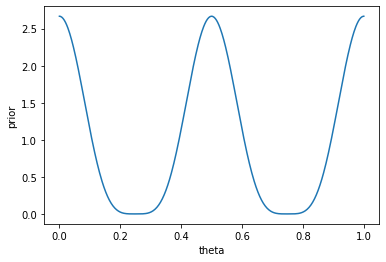

In [2]:
theta = np.linspace(0, 1, 501)
plt.plot(theta, np.power(np.cos(4 * math.pi * theta) + 1, 2) / 1.5)
plt.xlabel('theta')
_ = plt.ylabel('prior')

**(C)** In the script `BernMetro.R`, find the function definition that speifies the prior distribution. Inside that function definition, comment out the line that assigns a beta density to `pTheta` and instead put in a trimodal prior like this:

```
#pTheta = dbeta(theta, 1, 1)
pTheta = (cos(4*pi*theta)+1)^2/1.5
```

To have the Metropolis algorithm explore the prior, we give it empty data. Fin the line in the script that specifies the data and set `myData = c()`. Run the script, using a proposal SD = 0.2. Include the graphial output in your write-up. Does the histogram of the trajetory look like the graph of the previous part of the exercise?

In [3]:
with open('../../util/bern_metrop.py', 'r') as f:
    a = ''.join(f.readlines())

In [4]:
a = a.replace('p_theta = beta.pdf(theta, 1, 1)',
              'p_theta = np.power(np.cos(4 * math.pi * theta) + 1, 2) / 1.5') \
     .replace('my_data = np.concatenate((np.repeat(0, 6), np.repeat(1, 14)), axis = None)',
              'my_data = np.array([])')

In [5]:
exec(a)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


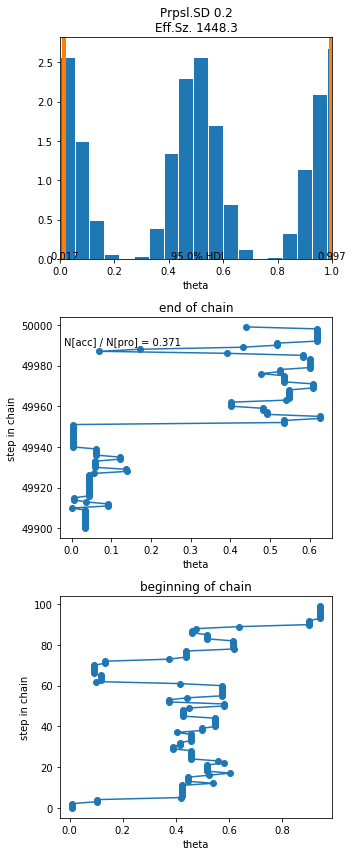

In [6]:
bern_metrop(0.2)

The trajectory seems to be focusing mostly in the three different prior modes. 

**(D)** Repeat the previous part but now with `myData = c(0, 1, 1)`. Include the graphical output in your write-up, Does the posterior distribution make sense? Explain why. 

In [7]:
a = a.replace('my_data = np.array([])',
              'my_data = np.array([0, 1, 1])')

In [8]:
exec(a)

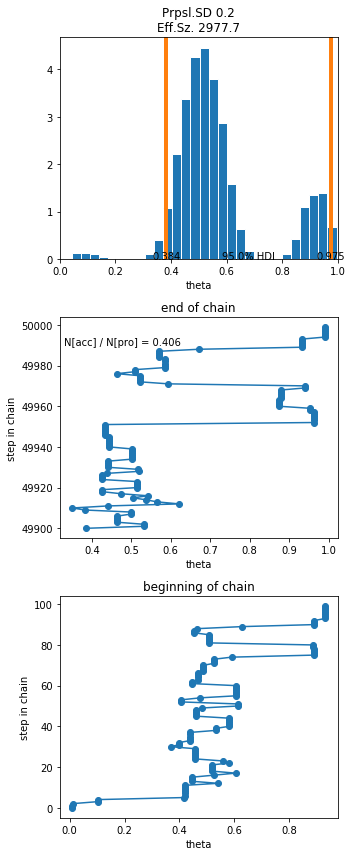

In [9]:
bern_metrop(0.2)

The results seem to make sense: according to the observed data, it is more likely that the actual bias is greater or equal than 0.5. 

**(E)** Repeat the previous part but now with proposal SD = 0.02. Include the graphical output in your write-up. Does the posterior distribution make sense? Explain *why not*; what has gone wrong? If we did not know from the previous part that this output was unrepresentative of the true posterior, how could we try to check? *Hint*: See next part. 

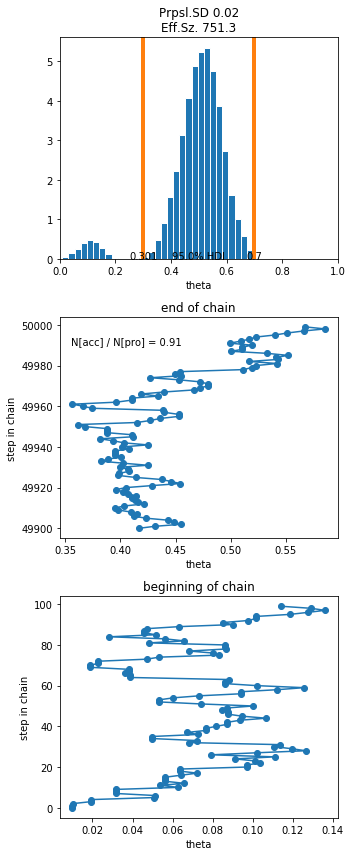

In [10]:
bern_metrop(0.02)

The estimated posterior does not seem to represent the actual posterior. It seems like the random walker got stuck in the central mode given the fact that the suggested step is very small.

We could try different step sizes to see how variable the estimation of the posterior is. 

**(E)** Repeat the previous part but now with the initial position at 0.99: `trajectory[1] = 0.99`. In conjunction with the previous part, what does this result tell us?

In [11]:
a = a.replace('trajectory[0] = 0.01',
              'trajectory[0] = 0.99')

In [12]:
exec(a)

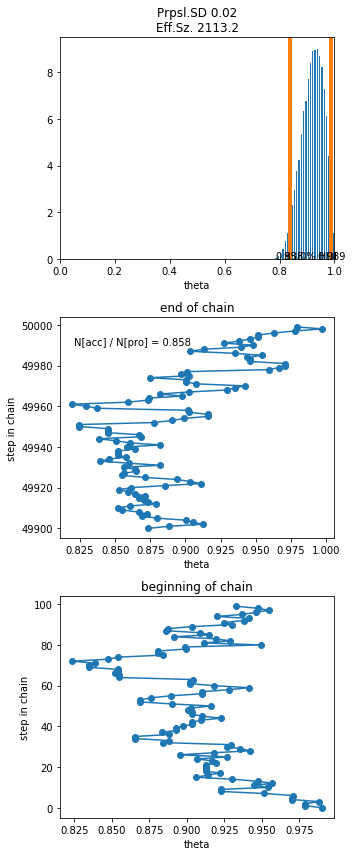

In [13]:
bern_metrop(0.02)

This result confirms what we already mentioned in the previous exercise: such a small SD value results in the random walker getting stuck in a local minimum. 